In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests
from math import floor

/Users/rajeshkumar/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [5]:
df.shape

(10409, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [7]:
df.describe().T.apply(lambda x: x.apply("{0:.3f}".format))

,count,mean,std,min,25%,50%,75%,max
Open,10409.000,13.960,30.169,0.050,0.282,0.469,14.218,182.630
High,10409.000,14.112,30.515,0.050,0.288,0.478,14.364,182.940
Low,10409.000,13.809,29.835,0.049,0.275,0.460,14.044,179.120
Close,10409.000,13.967,30.192,0.049,0.281,0.469,14.206,182.010
Adj Close,10409.000,13.350,29.911,0.038,0.235,0.387,12.188,181.778
Volume,10409.000,332177847.171,339334418.573,0.000,124760400.000,219968000.000,412610800.000,7421640800.000


In [8]:
print(df.duplicated().sum())

0


In [9]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.shape

(10409, 7)

In [12]:
window_size = 50

In [13]:
df["MA"] = df["Close"].rolling(window_size).mean()

In [14]:
print(df["MA"])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
10404    166.5874
10405    166.4550
10406    166.3880
10407    166.3484
10408    166.3282
Name: MA, Length: 10409, dtype: float64


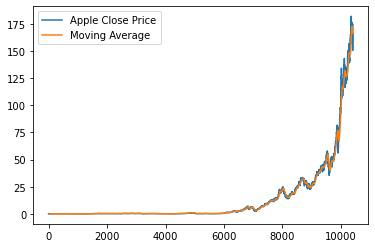

,Date,Open,High,Low,Close,Adj Close,Volume,MA
45,1981-02-18,0.121652,0.122768,0.121652,0.121652,0.095089,19241600,NaN
46,1981-02-19,0.114955,0.114955,0.114397,0.114397,0.089418,22310400,NaN
47,1981-02-20,0.108817,0.108817,0.108259,0.108259,0.084621,24371200,NaN
48,1981-02-23,0.109933,0.110491,0.109933,0.109933,0.085929,14112000,NaN
49,1981-02-24,0.107143,0.107143,0.106027,0.106027,0.082876,16979200,0.132578


In [17]:
plt.plot(df["Close"], label="Apple Close Price")
plt.plot(df["MA"], label="Moving Average")
plt.legend()
plt.show()

In [19]:
df2 = df.iloc[49:].copy()
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA
49,1981-02-24,0.107143,0.107143,0.106027,0.106027,0.082876,16979200,0.132578
50,1981-02-25,0.112723,0.113281,0.112723,0.112723,0.088110,19488000,0.132266
51,1981-02-26,0.114397,0.114955,0.114397,0.114397,0.089418,10841600,0.132121
52,1981-02-27,0.118304,0.119420,0.118304,0.118304,0.092472,14761600,0.132232
53,1981-03-02,0.118862,0.119420,0.118862,0.118862,0.092908,11760000,0.132299
